#### 1. 한남대학교 캠퍼스 맵(campus map) 사진에 QR code를 삽입하시오.
- (1) http://www.hannam.ac.kr/data/building.html 주소가 저장된 QR code를 생성하여 QR_campus_map.png 파일로 저장하시오.

In [16]:
### Package
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import qrcode

In [17]:
### 출력 영상 크기
plt.rcParams["figure.figsize"] = [16,9]
### 한글 표시
plt.rcParams['font.family'] = "Gulim"

In [18]:
### 내용
msg = 'http://www.hannam.ac.kr/data/building.html'

### QR image 생성
img = qrcode.make(msg)

### png 파일로 저장
img.save("QR_campus_map.png")

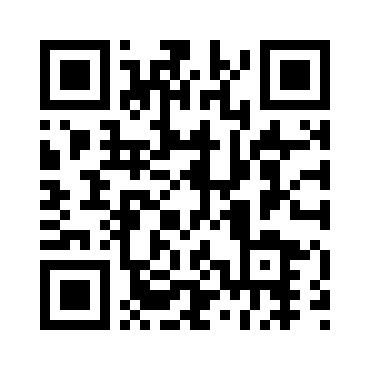

In [19]:
### 영상 출력
img

- (2) 2021_1220-campus_map.jpg 영상의 우측 상단에 QR_campus_map.png를 삽입하시오.

In [20]:
### 영상 읽기
img_map = cv2.imread(r"C:\python_media\2021_media\mid\2021_1220-campus_map.jpg")
img_QR = cv2.imread(r'C:\python_media\QR_campus_map.png')

In [21]:
### 영상 크기 확인
img_map.shape

AttributeError: 'NoneType' object has no attribute 'shape'

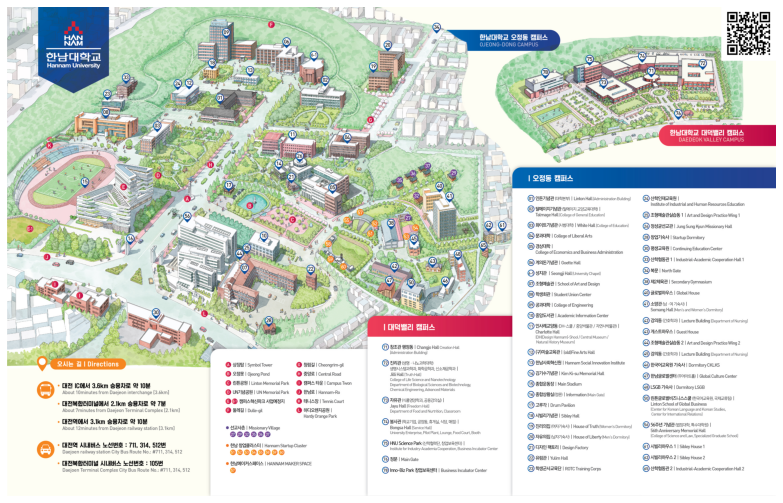

In [ ]:
### 영상 삽입
img_out = img_map.copy()
img_out[:img_QR.shape[0], -img_QR.shape[1]:, :] = img_QR

### 영상 출력
img_rgb = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

#### 2. watermelon_1.jpg 영상의 배경으로 water_2.jpg를 합성한 영상을 생성하시오.

In [ ]:
### 영상 읽기
img_wm1 = cv2.imread(r'C:\Users\sse88\Downloads\junggangosa\watermelon_1.jpg')

### 마스크 - 이진영상
img_gray = cv2.cvtColor(img_wm1, cv2.COLOR_BGR2GRAY)
ret, img_binary_inv = cv2.threshold(img_gray, 245, 255, cv2.THRESH_BINARY_INV)

### 논리연산 → 영상 추출
img_1 = cv2.bitwise_and(img_wm1, cv2.cvtColor(img_binary_inv, cv2.COLOR_GRAY2BGR))

In [ ]:
### 영상 읽기
img_wm2 = cv2.imread(r'C:\Users\sse88\Downloads\junggangosa\watermelon_2.jpg')

### 마스크 - 이진영상
ret, img_binary = cv2.threshold(img_gray, 245, 255, cv2.THRESH_BINARY)

### 논리연산 → 영상 추출
img_2 = cv2.bitwise_and(img_wm2, cv2.cvtColor(img_binary, cv2.COLOR_GRAY2BGR))

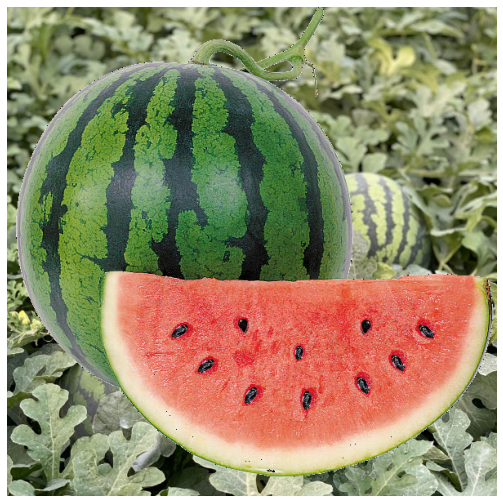

In [ ]:
### 산술연산 → 영상 합성
img_wm3 = cv2.add(img_1, img_2)

### 영상 출력
img_rgb = cv2.cvtColor(img_wm3, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

#### 3. watermelon_1.jpg 영상에 주어진 마스크를 이용하여 컨볼루션 연산을 수행한 결과를 출력하시오.
- (1)

In [ ]:
mask_n = 21
mask_1 = np.zeros((mask_n,mask_n))

In [ ]:
mask_1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.       

In [ ]:
mask_1[mask_n//2,:]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [ ]:
mask_1[mask_n//2,:] = 1

10

In [ ]:
mask_1

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.,

In [ ]:
mask_1 /= np.sum(mask_1)

In [ ]:
### Mask
mask_n = 21
mask_1 = np.zeros((mask_n,mask_n))
mask_1[:,mask_n//2] = 1
mask_1 /= np.sum(mask_1)

### 컨볼루션(convolution) - 합성곱
img_mask_1 = cv2.filter2D(img_raw, -1, mask_1)

### 영상 출력
img_rgb = cv2.cvtColor(img_mask_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

NameError: name 'img_wm1' is not defined

- (2)

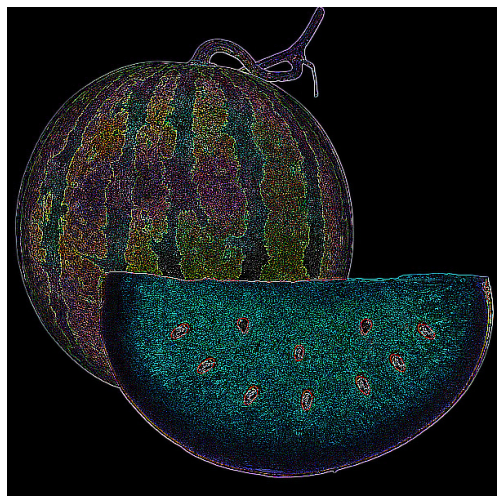

In [ ]:
### Mask
mask_2 = np.array([[-1, -1, -1],
                  [-1, 8, -1],
                  [-1, -1, -1]])

### 컨볼루션(convolution) - 합성곱
img_mask_2 = cv2.filter2D(img_wm1, -1, mask_2)

### 영상 출력
img_rgb = cv2.cvtColor(img_mask_2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()